In [2]:
import pandas as pd

#dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

#df = pd.read_csv(infile, parse_dates=['datetime'], )


train=pd.read_csv("/home/dell/datascienceLearning/ashrae-energy-prediction kaggle/tgf_train.csv", parse_dates=['IssueDate'],index_col='IssueDate')
train.head()

,PaidFare,BaseFare,Tax,TotalTravelTimeinMinutes
IssueDate,,,,
2018-04-12,132.75,62.0,70.75,205.0
2019-03-20,39.50,39.5,0.00,196.0
2019-03-20,45.00,45.0,0.00,198.0
2019-03-29,4988.00,4198.0,790.00,1385.0
2019-03-04,5151.25,4459.0,692.25,1480.0


Text(0.5, 1.0, 'Monthly ticket sales for business trip.')

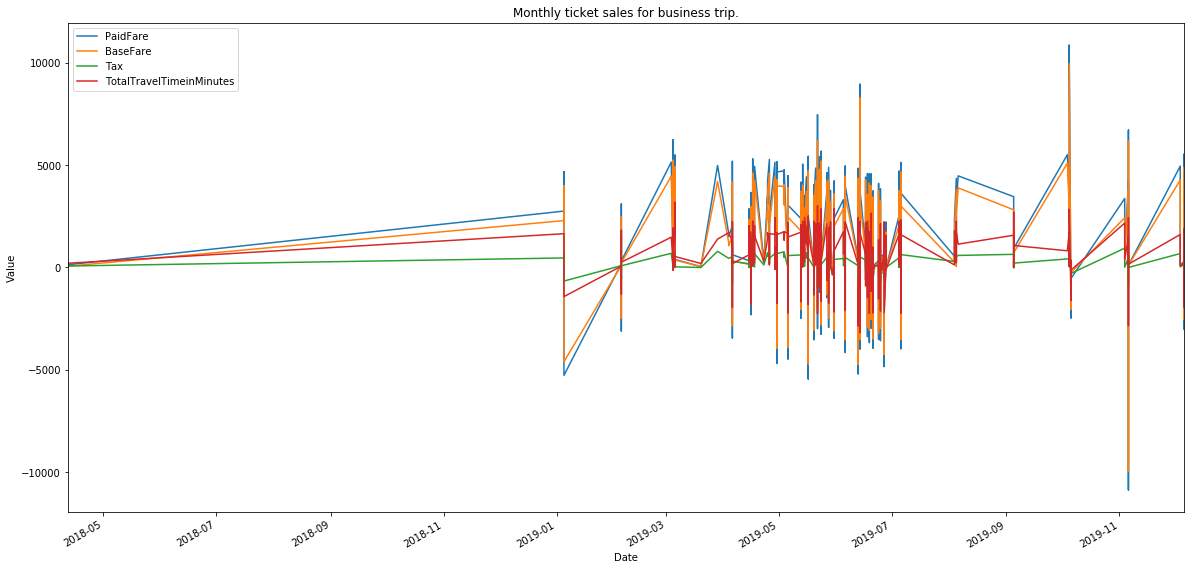

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

train.plot(figsize=(20,10))
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Monthly ticket sales for business trip.')

In [8]:
df1=train
#df1=df1.drop(['BaseFare'],axis=1)
df1=df1.drop(['Tax'],axis=1)
df1=df1.drop(['BaseFare'],axis=1)

In [11]:
df1=df1.drop(['TotalTravelTimeinMinutes'],axis=1)

In [15]:
df1.columns

Index(['PaidFare'], dtype='object')

Text(0.5, 1.0, 'Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

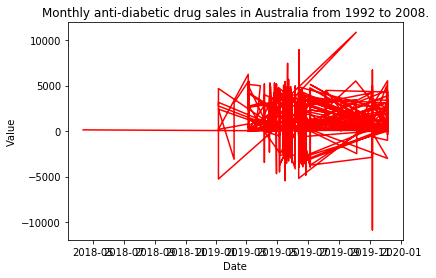

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df1.index,df1.PaidFare,color='r')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

# Decomposition

In [19]:
df1.isnull().sum()

PaidFare    12
dtype: int64

In [21]:
df1=df1.dropna()
df1.isnull().sum()

PaidFare    0
dtype: int64

In [28]:
df1=df1.drop(df1[df1.PaidFare<0].index)
  

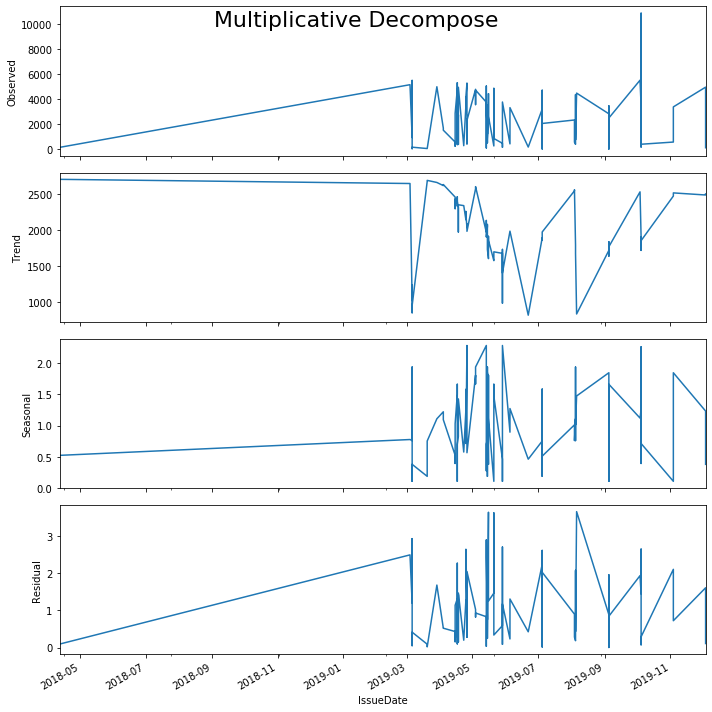

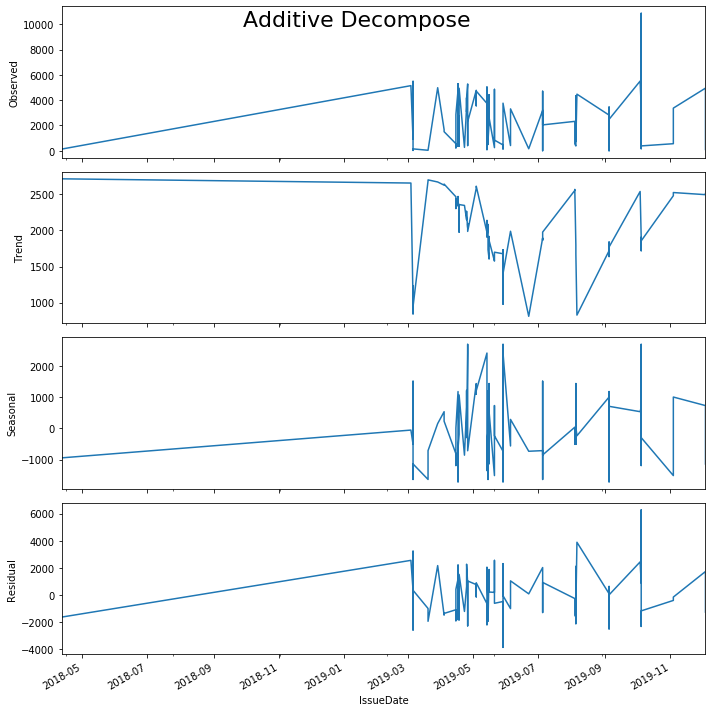

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
import matplotlib.pyplot as plt

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df1['PaidFare']+0.5, model='multiplicative', extrapolate_trend='freq',freq = 52)

# Additive Decomposition
result_add = seasonal_decompose(df1['PaidFare']+0.5, model='additive', extrapolate_trend='freq',freq = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

The numerical output of the trend, seasonal and residual components are stored in the result_mul output itself. Let’s extract them and put it in a dataframe.

In [31]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
IssueDate,,,,
2018-04-12,0.523321,2711.760371,0.093896,133.25
2019-03-20,0.753439,2697.164260,0.019684,40.00
2019-03-20,0.186879,2682.568150,0.090761,45.50
2019-03-29,1.109939,2667.972040,1.684572,4988.50
2019-03-04,0.777119,2653.375929,2.498436,5151.75


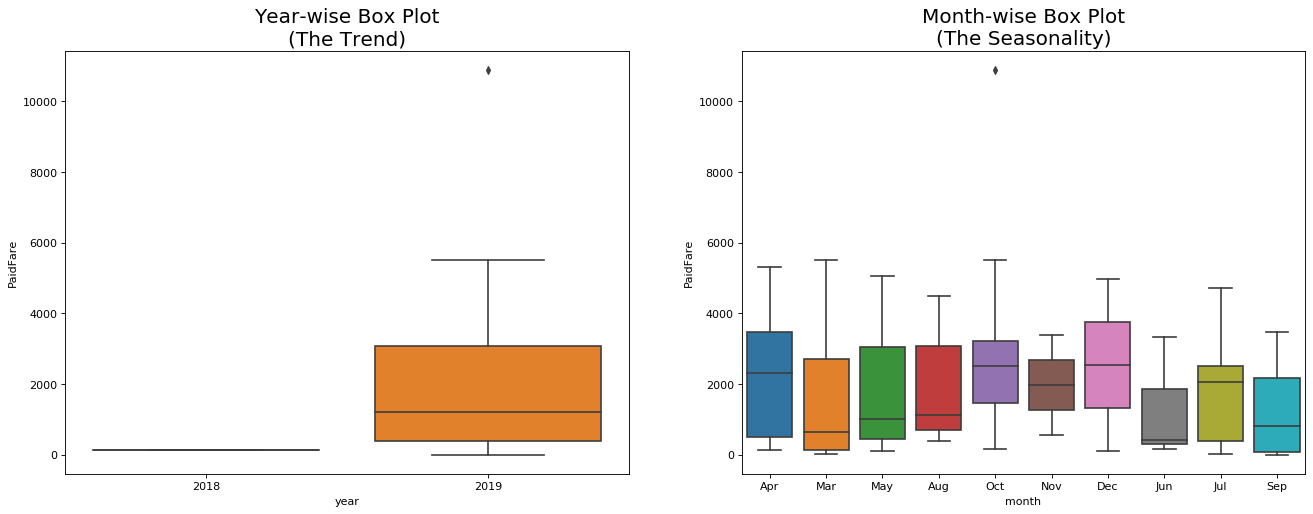

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data
df = df1
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.IssueDate]
df['month'] = [d.strftime('%b') for d in df.IssueDate]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='PaidFare', data=df, ax=axes[0])
sns.boxplot(x='month', y='PaidFare', data=df.loc[~df.year.isin([2017, 2020]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# Detrending a Time Series

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

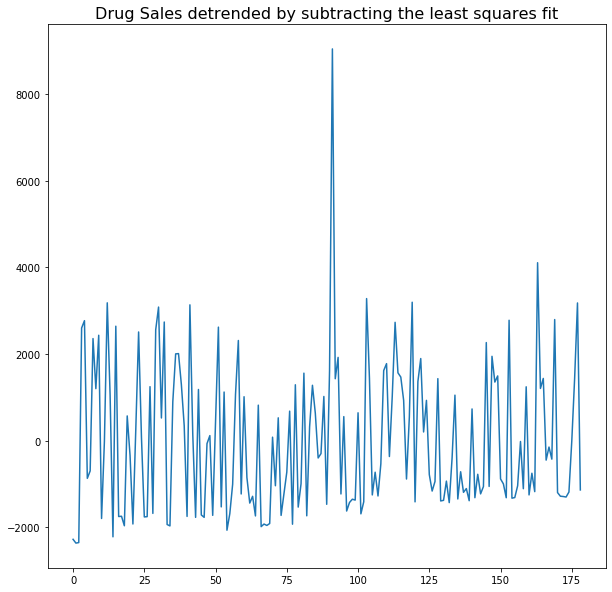

In [35]:
from scipy import signal
df = df1
detrended = signal.detrend(df.PaidFare.values)
plt.plot(detrended)
plt.title('Ticket Fare Sales detrended by subtracting the least squares fit', fontsize=16)

Text(0.5, 1.0, 'Ticket Sales detrended by subtracting the trend component')

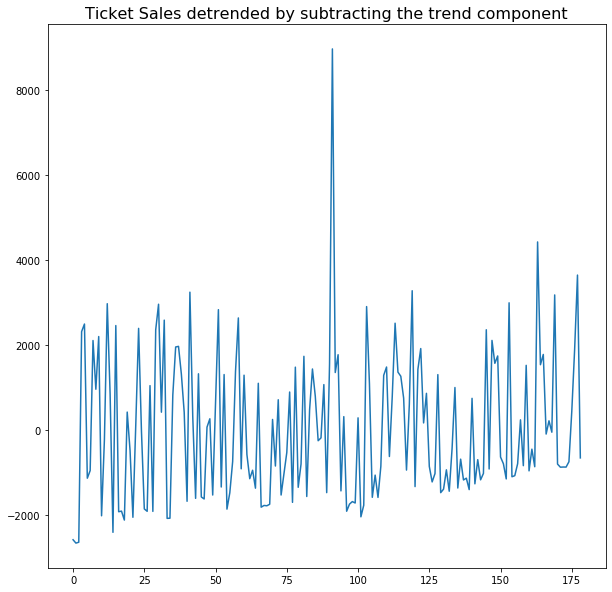

In [38]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
df = df1
result_mul = seasonal_decompose(df['PaidFare']+0.5, model='multiplicative', extrapolate_trend='freq',freq = 52)
detrended = df.PaidFare.values - result_mul.trend
plt.plot(detrended)
plt.title('Ticket Sales detrended by subtracting the trend component', fontsize=16)

# Deseasonalising Time Series

[]

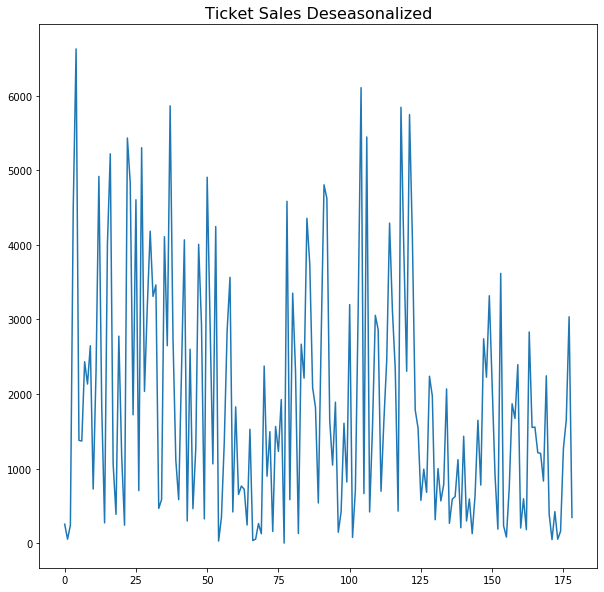

In [40]:
# Time Series Decomposition
result_mul = seasonal_decompose(df['PaidFare']+0.5, model='multiplicative', extrapolate_trend='freq',freq=52)

# Deseasonalize
deseasonalized = df.PaidFare.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Ticket Sales Deseasonalized', fontsize=16)
plt.plot()

# Determining AugmentFuller Test Statistics

In [48]:
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd

df = df1
# ADF Test
result = adfuller(df.PaidFare.values)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -11.574293417605572
p-value: 3.049021819343746e-21
Critical Values:
	1%: -3.467631519151906
	5%: -2.8779183721695567
	10%: -2.575501353364474


The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

In [50]:
result = adfuller(df['PaidFare'].diff().dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.641015422723111
p-value: 5.4098917742602945e-09
Critical Values:
	1%: -3.470126426071447
	5%: -2.8790075987120027
	10%: -2.5760826967621644


In [52]:
!pip install pmdarima

     |████████████████████████████████| 1.1MB 397kB/s eta 0:00:01


# the order of differencing (d) in ARIMA model

In [53]:
from pmdarima.arima.utils import ndiffs
## Adf Test
ndiffs(df['PaidFare'], test='adf') 

0

#  the order of the AR term (p)

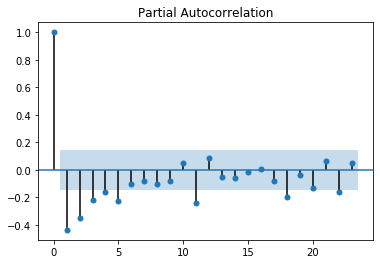

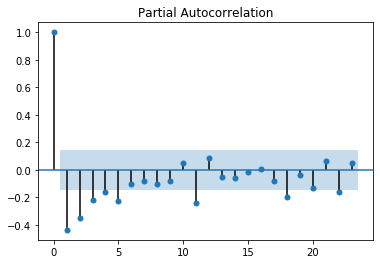

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# PACF plot of 1st differenced series

plot_pacf(df['PaidFare'].diff().dropna())


 # the order of the MA term (q)

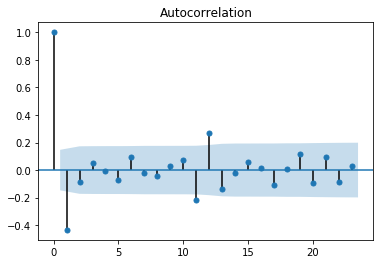

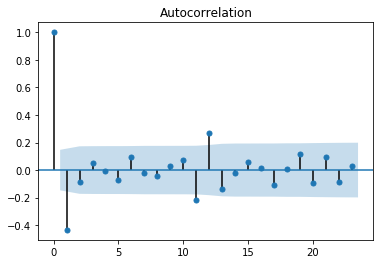

In [55]:
plot_acf(df['PaidFare'].diff().dropna())

In [56]:
import pmdarima as pm

model = pm.auto_arima(df['PaidFare'].diff().dropna(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=3166.567, BIC=3179.294, Fit time=0.302 seconds
Fit ARIMA: order=(0, 0, 0); AIC=3262.252, BIC=3268.616, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=3226.415, BIC=3235.960, Fit time=0.028 seconds
Fit ARIMA: order=(0, 0, 1); AIC=3166.719, BIC=3176.264, Fit time=0.122 seconds
Fit ARIMA: order=(2, 0, 1); AIC=3168.520, BIC=3184.429, Fit time=0.312 seconds
Fit ARIMA: order=(1, 0, 2); AIC=3168.448, BIC=3184.356, Fit time=0.357 seconds
Fit ARIMA: order=(2, 0, 2); AIC=3170.428, BIC=3189.519, Fit time=0.425 seconds
Total fit time: 1.556 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  178
Model:                     ARMA(1, 1)   Log Likelihood               -1579.284
Method:                       css-mle   S.D. of innovations           1701.925
Date:                Fri, 15 Nov 2019   AIC                           3166.567
Time:                 

In [57]:
from statsmodels.tsa.arima_model import ARIMA
# Build Model
model = ARIMA(df['PaidFare'], order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:               PaidFare   No. Observations:                  179
Model:                     ARMA(1, 1)   Log Likelihood               -1587.383
Method:                       css-mle   S.D. of innovations           1718.177
Date:                Fri, 15 Nov 2019   AIC                           3182.765
Time:                        17:55:56   BIC                           3195.515
Sample:                             0   HQIC                          3187.935
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1844.8507    176.919     10.428      0.000    1498.095    2191.606
ar.L1.PaidFare     0.7501      0.311      2.413      0.017       0.141       1.359
ma.L1.PaidFare    -0.6537      0.359

In [58]:
# Forecast
fc,_,_ = model_fit.forecast(10)  

# Make as pandas series
fc_series = pd.Series(fc)
fc_series

0    1795.515489
1    1807.842280
2    1817.089125
3    1824.025572
4    1829.228893
5    1833.132123
6    1836.060100
7    1838.256498
8    1839.904109
9    1841.140052
dtype: float64